# Decentralized Partially Observable Markov Decision Processes


## Zdecentralizowany częściowo obserwowalny proces decyzyjny Markowa

Wiele domen wieloagentowych jest opartych na współpracy, gdzie wszyscy agenci działają niezależnie w środowisku, pracując nad wspólnym celem. Zastosowania obejmują robotyczne *search and rescue* czy międzyplanetarne łaziki eksploracyjne. Zdecentralizowany częściowo obserwowalny proces decyzyjny Markowa (Dec-POMDP) uchwyca ogólność POMDP, skupiając się na takich współpracujących agentach. Model jest bardziej podatny na skalowalne algorytmy aproksymacyjne ze względu na jego pojedynczy wspólny cel, w przeciwieństwie do znajdowania równowagi wśród wielu indywidualnych celów agentów.

## Systemy wieloagentowe i decentralizacja
W systemach wieloagentowych kluczowe są koordynacja i wymiana informacji między agentami.

- **Sterowanie scentralizowane**: W wieloagentowym MDP lub POMDP jeden kontroler może zarządzać wszystkimi agentami, zakładając pełną komunikację.
- **Sterowanie zdecentralizowane**: W realistycznych scenariuszach (np. roboty z ograniczoną komunikacją) agenci podejmują decyzje niezależnie, opierając się na lokalnych obserwacjach, bez centralnego koordynatora.

- **Wyzwania**:
  - Częściowa obserwowalność globalnego stanu przez każdego agenta.
  - Brak bezpośredniego dostępu do obserwacji lub akcji innych agentów (chyba że są współdzielone).
  - Potrzeba implicytnej koordynacji poprzez indywidualne polityki.


## Dec-POMDP
Dec-POMDP formalizują zdecentralizowane systemy wieloagentowe z częściową obserwowalnością.

- **Definicja**: Dec-POMDP to krotka $(N, S, \{A_i\}, T, R, \{\Omega_i\}, \{O_i\}, \gamma)$, gdzie:
  - $N$: Zbiór agentów (np. $n$ robotów).
  - $S$: Zbiór stanów globalnych (wspólne środowisko).
  - $A_i$: Zbiór akcji dla agenta $i$ (akcja wspólna $\vec{a} = (a_1, ..., a_n)$).
  - $T(s' | s, \vec{a})$: Funkcja przejścia (zależna od wspólnych akcji).
  - $R(s, \vec{a})$: Wspólna funkcja nagrody (wspólny cel agentów).
  - $\Omega_i$: Zbiór obserwacji dla agenta $i$ (lokalne obserwacje).
  - $O_i(o_i | s', \vec{a})$: Funkcja obserwacji dla agenta $i$ (prawdopodobieństwo zaobserwowania $o_i$).
  - $\gamma$: Współczynnik dyskontowy.

- **Kluczowa idea**: **Każdy agent $i$ widzi tylko swoją obserwację $o_i$ i wybiera akcję $a_i$ niezależnie, na podstawie lokalnej historii $H_i$ (przeszłe obserwacje i akcje). Komunikacja nie występuje, chyba że jest zamodelowana.**

- **Polityka**: Lokalna polityka agenta $i$ to $\pi_i: H_i \to A_i$. Polityka wspólna to $\vec{\pi} = (\pi_1, ..., \pi_n)$.

- **Cel**: Znaleźć politykę wspólną $\vec{\pi}$, która maksymalizuje:
  $$
  E\left[\sum_{t=0}^\infty \gamma^t R(s_t, \vec{a}_t)\right]
  $$
  mimo zdecentralizowanego podejmowania decyzji.

## Przykład: Dwa roboty sprzątające
Rozważmy dwa roboty sprzątające pokój:
- **Stany**: Sekcje pokoju (brudne lub czyste).
- **Akcje**: "Czyścić" lub "przemieszczać się".
- **Obserwacje**: Każdy robot widzi tylko swoją sekcję (brudna lub czysta).
- **Nagroda**: $+1$, jeśli obie sekcje są czyste, $0$ w przeciwnym razie.
- **Wyzwanie**: Robot 1 nie zna obserwacji ani akcji Robota 2. Potrzebują polityk (np. "czyść, jeśli brudne, inaczej się przemieszczaj"), które współpracują bez komunikacji.

## Rozwiązywanie Dec-POMDP
Dokładne rozwiązania są zwykle niewykonalne, ale stosuje się następujące podejścia:
- **Skończony horyzont**: Ograniczenie liczby kroków (np. $T=3$) i użycie programowania dynamicznego.
- **Nieskończony horyzont**: Aproksymacja za pomocą heurystycznych polityk lub kontrolerów o skończonej liczbie stanów.
- **Algorytmy**: Wieloagentowe uczenie ze wzmocnieniem, aproksymacje przestrzeni stanów wiary (*belief state*) lub warianty z komunikacją.


# [Simple spread](https://pettingzoo.farama.org/environments/mpe/simple_spread/)


In [1]:
!pip install pettingzoo
!pip install 'pettingzoo[mpe]'
!pip install stable_baselines3
!pip install supersuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.5/852.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

Setting up the environment...
Environment setup complete.
Initializing PPO agent...
Using cuda device
Starting training for 200000 timesteps...
Logging to ./ppo_simple_spread_log/tb/PPO_1


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -27.2    |
| time/              |          |
|    fps             | 1179     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 6144     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | -25.3       |
| time/                   |             |
|    fps                  | 808         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.007332292 |
|    clip_fraction        | 0.0564      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | -0.0143     |
|    learning_rate        | 0.

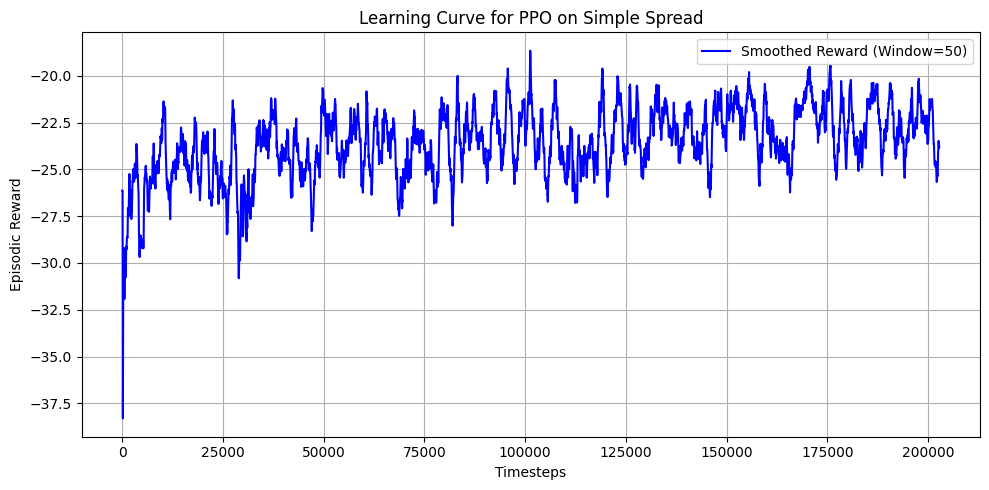

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Used for rolling average calculation
from pettingzoo.mpe import simple_spread_v3
import supersuit as ss
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import VecMonitor # Monitor to track episode stats
from stable_baselines3.common.results_plotter import load_results, ts2xy

N_AGENTS = 3          # Number of agents in the environment
MAX_CYCLES = 25       # Max steps per episode
CONTINUOUS_ACTIONS = False # Use discrete actions (simpler for PPO)
TOTAL_TIMESTEPS = 200_000 # Total training steps
LOG_DIR = "./ppo_simple_spread_log/" # Directory for logs and model
os.makedirs(LOG_DIR, exist_ok=True)

print("Setting up the environment...")
env = simple_spread_v3.parallel_env(
    N=N_AGENTS,
    local_ratio=0.5,
    max_cycles=MAX_CYCLES,
    continuous_actions=CONTINUOUS_ACTIONS
)

env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, num_vec_envs=1, num_cpus=1, base_class="stable_baselines3")
env = VecMonitor(env, LOG_DIR)
print("Environment setup complete.")

print("Initializing PPO agent...")
# Use the Multi-Layer Perceptron (MLP) policy network
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log=LOG_DIR + "tb/",
    # You might need to tune hyperparameters for better performance
    # learning_rate=3e-4,
    # n_steps=256, # Corresponds to MAX_CYCLES * N_AGENTS ideally, or factors
    # batch_size=64,
    # gamma=0.99,
    # gae_lambda=0.95,
    # n_epochs=10,
    # ent_coef=0.01,
)

print(f"Starting training for {TOTAL_TIMESTEPS} timesteps...")
model.learn(total_timesteps=TOTAL_TIMESTEPS)
print("Training finished.")
env.close() # Close the environment
print("Plotting learning curve...")

x, y = ts2xy(load_results(LOG_DIR), "timesteps") # x = timesteps, y = episodic reward

if len(x) > 0:
    df = pd.DataFrame({'timesteps': x, 'reward': y})
    window_size = 50 # Adjust window size for more or less smoothing
    df['reward_smooth'] = df['reward'].rolling(window=window_size, min_periods=1).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(df['timesteps'], df['reward_smooth'], label=f"Smoothed Reward (Window={window_size})", color='blue')
    plt.xlabel("Timesteps")
    plt.ylabel("Episodic Reward")
    plt.title("Learning Curve for PPO on Simple Spread")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plot_path = os.path.join(LOG_DIR, "learning_curve.png")
    plt.savefig(plot_path)
    print(f"Learning curve plot saved to {plot_path}")
    plt.show()
else:
    print("No log data found. Ensure training ran and Monitor saved results.")

# Ćwiczenie

1. Jaka jest pojedyncza obserwacja agenta w środowisku `simple_spread_v3`? Zaprezentuj ją i wyjaśnij, jakie informacje zawiera.
2. Wytłumacz, dlaczego środowisko `simple_spread_v3` jest Dec-POMDP.
3. Przeprowadź badanie w środowisku `simple_spread_v3`, porównując algorytmy (PPO, A2C, SAC, DQN). Zmodyfikuj kod: zmień algorytmy w `model`, dostosuj hiperparametry (np. `learning_rate`, `gamma`). Wykonaj 5 takich eksperymentów. Porównaj wykresy uczenia. Który eksperyment dał najlepsze wyniki?


# Rozwiązanie

### 1. Jaka jest pojedyncza obserwacja agenta w środowisku `simple_spread_v3`? Zaprezentuj ją i wyjaśnij, jakie informacje zawiera.

Jest to wektor 18 liczb zmiennoprzecinkowych, które opisują:
- self_vel
  - (2 wartości)
  - prędkość agenta w osiach x i y

- self_pos
  - (2 wartości)
  - pozycja agenta względem osi x i y

- landmark_rel_positions
  - (6 wartości - landmark x 2)
  - spłaszczony wektor względnych pozycji (x,y) wszystkich 3 znaczników (landmarks), liczonych od locations agenta

- other_agent_rel_positions
  - (4 wartości - (liczba agentów - 1) x 2)
  - względne pozycje (x,y) pozostałych 2 agentów widziane z perspektywy danego agenta

- communication
  - (4 wartości)
  - kanały komunikacji (wiadomości) otrzymane od innych agentów; w simple_spread_v3 domyślnie nie są wykorzystywane (zwykle wektor zer)

Przykład:

obs_vector = [

   0.00,   0.00,       0.50,  -0.20, \# self_vel            self_pos

   0.10,  -0.30,       0.75,   0.10,       -0.40,  0.50,  \# landmark_rel_positions  (3 landmarks x 2 wymiary)

  -0.20,   0.80,       0.30,  -0.60,  \# other_agent_rel_positions (2 innych agentów x 2 wymiary)

   0.00,   0.00,       0.00,   0.00  \# communication (4 wymiary)

]

### 2. Wytłumacz, dlaczego środowisko `simple_spread_v3` jest Dec-POMDP.

Dlaczego środowisko `simple_spread_v3` jest Dec-POMD (Decentralized Partially Observable Markov Decision Process):

1. Posiada wielu niezależnych agentów, gdzie każdy z nich wybiera swoją akcję wyłącznie na podstawie włąsnej obserwacji.

2. Małą ograniczony wlgąd w stan - żaden z agentów nie widzi pełnego stanu środowiska (brakuje im wiedzy o pozycji i prędkości agentów i landmarków) i działają znając jedynie lokalne dane.

3. Pomimo działania niezależnego, środowisko oblicza wspólną nagrodę dla wszystkich agentów, agenci mają wspólny cel

4. Zmiana stanu następuje przez równoległe dokonanie akcji przez wszystkich agentów

Razem, te właściwości środowiska pokazują, że jest ono przykładem Dec-POMDP

### 3. Przeprowadź badanie w środowisku `simple_spread_v3`, porównując algorytmy (PPO, A2C, SAC, DQN). Zmodyfikuj kod: zmień algorytmy w `model`, dostosuj hiperparametry (np. `learning_rate`, `gamma`). Wykonaj 5 takich eksperymentów. Porównaj wykresy uczenia. Który eksperyment dał najlepsze wyniki?

Rozwiązanie kodowe poniżej:

Starting experiment: PPO_lr3e-4_g0.99
Setting up the environment...
Environment setup complete.
Initializing PPO agent...
Using cuda device
Starting training for 200000 timesteps...
Logging to ./PPO_lr3e-4_g0.99_simple_spread_log/tb/PPO_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -26.5    |
| time/              |          |
|    fps             | 1610     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 6144     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | -24.4       |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 12288       |
| train/                  |             |
|

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | -31.2    |
| time/                 |          |
|    fps                | 1087     |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1500     |
| train/                |          |
|    entropy_loss       | -1.51    |
|    explained_variance | 0.0407   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8.91    |
|    value_loss         | 40.2     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | -31.5    |
| time/                 |          |
|    fps                | 1097     |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 3000     |
| train/                |          |
|

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


Streaming output truncated to the last 5000 lines.
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -22      |
| time/              |          |
|    episodes        | 6840     |
|    fps             | 239      |
|    time_elapsed    | 712      |
|    total_timesteps | 171000   |
| train/             |          |
|    actor_loss      | 12.4     |
|    critic_loss     | 4.45     |
|    ent_coef        | 0.0119   |
|    ent_coef_loss   | -0.0863  |
|    learning_rate   | 0.001    |
|    n_updates       | 56966    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -22.3    |
| time/              |          |
|    episodes        | 6844     |
|    fps             | 239      |
|    time_elapsed    | 713      |
|    total_timesteps | 171150   |
| train/             |         

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


Streaming output truncated to the last 5000 lines.
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6668     |
|    fps              | 1547     |
|    time_elapsed     | 107      |
|    total_timesteps  | 166725   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.557    |
|    n_updates        | 13885    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | -21.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6672     |
|    fps              | 1547     |
|    time_elapsed     | 107      |
|    total_timesteps  | 166800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.615    |
|    n_updates        | 13891    |
----------------------------------
----------------------------------
| ro

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:78: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | -25      |
| time/              |          |
|    fps             | 1609     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 6144     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | -26.3       |
| time/                   |             |
|    fps                  | 990         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.005653754 |
|    clip_fraction        | 0.00936     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | -0.00859    |
|    learning_rate        | 0.

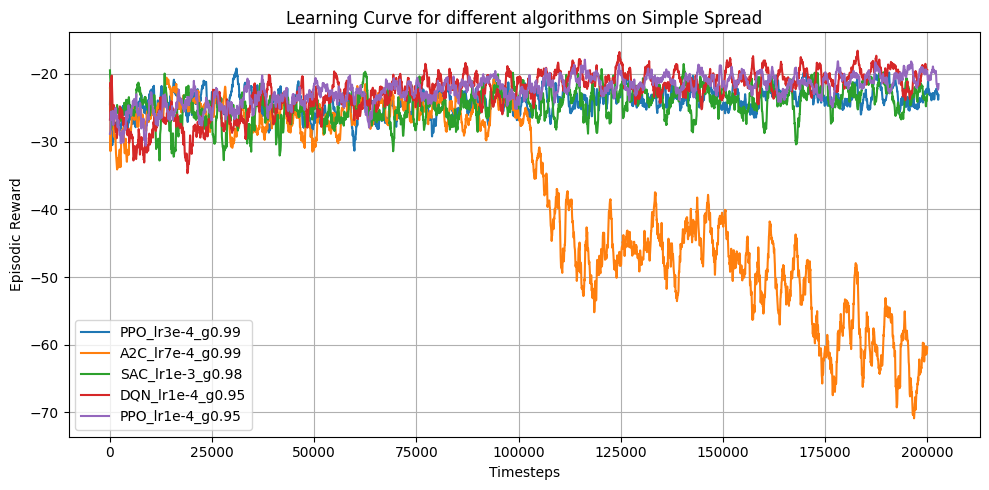

In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Used for rolling average calculation
from pettingzoo.mpe import simple_spread_v3
import supersuit as ss
from stable_baselines3 import PPO, A2C , SAC, DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import VecMonitor # Monitor to track episode stats
from stable_baselines3.common.results_plotter import load_results, ts2xy

N_AGENTS = 3          # Number of agents in the environment
MAX_CYCLES = 25       # Max steps per episode
CONTINUOUS_ACTIONS = False # Use discrete actions (simpler for PPO)
TOTAL_TIMESTEPS = 200_000 # Total training steps

experiments = [
    {"name": "PPO_lr3e-4_g0.99", "algo": PPO, "params": {"learning_rate": 3e-4, "gamma": 0.99}},
    {"name": "A2C_lr7e-4_g0.99", "algo": A2C, "params": {"learning_rate": 7e-4, "gamma": 0.99}},
    {"name": "SAC_lr1e-3_g0.98", "algo": SAC, "params": {"learning_rate": 1e-3, "gamma": 0.98}},
    {"name": "DQN_lr1e-4_g0.95", "algo": DQN, "params": {"learning_rate": 1e-4, "gamma": 0.95}},
    {"name": "PPO_lr1e-4_g0.95", "algo": PPO, "params": {"learning_rate": 1e-4, "gamma": 0.95}},
]

results = {}

for experiment in experiments:

    print(f'Starting experiment: {experiment["name"]}')

    LOG_DIR = f"./{experiment['name']}_simple_spread_log/" # Directory for logs and model
    os.makedirs(LOG_DIR, exist_ok=True)

    CONTINUOUS_ACTIONS = 'SAC' == experiment['name'].split('_')[0]  # SAC works only in continous environment

    print("Setting up the environment...")

    env = simple_spread_v3.parallel_env(
        N=N_AGENTS,
        local_ratio=0.5,
        max_cycles=MAX_CYCLES,
        continuous_actions=CONTINUOUS_ACTIONS
    )

    env = ss.pettingzoo_env_to_vec_env_v1(env)
    env = ss.concat_vec_envs_v1(env, num_vec_envs=1, num_cpus=1, base_class="stable_baselines3")
    env = VecMonitor(env, LOG_DIR)
    print("Environment setup complete.")

    print(f"Initializing {experiment['name'].split('_')[0]} agent...")
    # Use the Multi-Layer Perceptron (MLP) policy network

    model = experiment['algo'](
        "MlpPolicy",
        env,
        verbose=1,
        tensorboard_log=LOG_DIR + "tb/",
        **experiment["params"]
    )

    print(f"Starting training for {TOTAL_TIMESTEPS} timesteps...")
    model.learn(total_timesteps=TOTAL_TIMESTEPS)
    print("Training finished.")
    env.close() # Close the environment
    print("Plotting learning curve...")

    x, y = ts2xy(load_results(LOG_DIR), "timesteps") # x = timesteps, y = episodic reward

    if len(x) > 0:
        df = pd.DataFrame({'timesteps': x, 'reward': y})
        window_size = 50 # Adjust window size for more or less smoothing
        df['reward_smooth'] = df['reward'].rolling(window=window_size, min_periods=1).mean()
        results[experiment["name"]] = df

    else:
        print("No log data found. Ensure training ran and Monitor saved results.")

# All plots
plt.figure(figsize=(10, 5))

for experiment_name, experiment_data in results.items():
    plt.plot(experiment_data['timesteps'], experiment_data['reward_smooth'], label=experiment_name)

plt.xlabel("Timesteps")
plt.ylabel("Episodic Reward")
plt.title("Learning Curve for different algorithms on Simple Spread")
plt.grid(True)
plt.legend()
plt.tight_layout()
plot_path = os.path.join(LOG_DIR, "learning_curve.png")
plt.savefig(plot_path)
print(f"Learning curve plot saved to {plot_path}")
plt.show()


### Analiza wyników:

PPO_lr3e-4_g0.99 - Umimarkowana szybkość uczenia, niewielkie wachania

A2C_lr7e-4_g0.99 - Dobra nauka na początku, a potem niespodziewany spadek - najwidoczniej źle dobrane parmetry spowodowały, że model się "popsuł" na pewnym etapie treningu

SAC_lr1e-3_g0.98 - Szybki wzrost, ale większe wachania

DQN_lr1e-4_g0.95 - duży rozstrzał na początku, po czym stała poprawa i stabilność im dalszy etap nauki

PPO_lr1e-4_g0.95 - Umimarkowana szybkość uczenia, nieco szybsza nauka

Nie licząc A2C na końcu okazuje się, że wszystkie poradziły sobie pododbnie. Proces uczenia wyglądał również zbliżenie, choć można rozróżnić wśród nich bardziej lub mniej stabilne procesy uczenia, czasami w zależności od etapu.

W przypadku A2C zdecydowanie zawiodło dostosowanie parametrów uczenia - w procesie uczenia zachodzi moment graniczny po krótym model coraz gorzej radzi sobie z danymi i nie wraca potem do swojej szczytowej jakości